<a href="https://colab.research.google.com/github/a-nagar/cs4372/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 MB 3.7 MB/s eta 0:00:00


In [2]:
!pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 2.0 MB/s eta 0:00:00


In [3]:
import xgboost as xgb

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_california_housing
from matplotlib import pyplot as plt
import graphviz
import xgboost as xgb
import multiprocessing

In [5]:
X, y = fetch_california_housing(return_X_y=True)
xgb_model = xgb.XGBRegressor(n_jobs=multiprocessing.cpu_count() // 2)
clf = GridSearchCV(xgb_model, {'max_depth': [2, 4, 6],
                                   'n_estimators': [50, 100, 200]}, verbose=1,
                       n_jobs=2)
clf.fit(X, y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.688555675183378
{'max_depth': 4, 'n_estimators': 50}


In [6]:
model = clf.best_estimator_

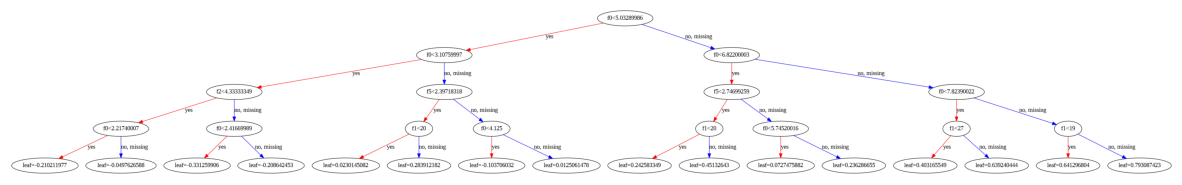

In [7]:
fig, ax = plt.subplots(figsize=(15, 15)) # Adjust figure size as needed
xgb.plot_tree(model, tree_idx=0, ax=ax)
plt.show()

In [8]:
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("https://an-utd-python.s3.us-west-1.amazonaws.com/pima-indians-diabetes.csv", header=None, names=col_names)
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [9]:
xgb_model = xgb.XGBClassifier(n_jobs=multiprocessing.cpu_count() // 2)
clf = GridSearchCV(xgb_model, {'max_depth': [2, 4, 6],
                                   'n_estimators': [50, 100, 200, 500]}, verbose=1,
                       n_jobs=2)
clf.fit(X, y)
print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.7721585603938544
{'max_depth': 2, 'n_estimators': 50}


In [10]:
model = clf.best_estimator_

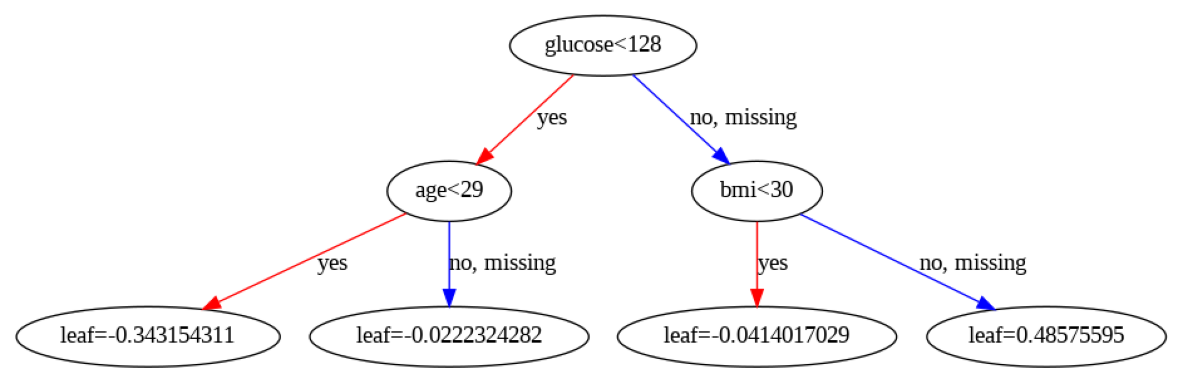

In [11]:
fig, ax = plt.subplots(figsize=(15, 15)) # Adjust figure size as needed
xgb.plot_tree(model, tree_idx=0, ax=ax)
plt.show()

# Application to the Cars Regression Dataset

In [12]:
cars = pd.read_csv("https://an-vistra.s3.us-west-1.amazonaws.com/data/auto-mpg.csv")

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = cars[['cyl', 'displ', 'hp', 'weight', 'accel', 'origin', 'size']].copy()
y = cars['mpg']

# Encode categorical 'origin'
le = LabelEncoder()
X['origin'] = le.fit_transform(X['origin'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [14]:
X_train.head()

,cyl,displ,hp,weight,accel,origin,size
218,8,318.0,150,4498,14.5,2,56.200011
254,8,305.0,145,3425,13.2,2,32.585069
299,4,97.0,67,1985,16.4,0,10.945069
191,4,121.0,115,2795,15.7,1,21.700069
56,6,232.0,100,2914,16.0,2,23.587211


In [15]:
#xgb_model = xgb.XGBRegressor(n_jobs=multiprocessing.cpu_count(), enable_categorical=True)
#xgb_model = xgb_model.fit(X_train, y_train)

model = xgb.XGBRegressor(n_estimators=10, random_state=42, enable_categorical=True, max_depth=2)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10,
             n_jobs=None, num_parallel_tree=None, ...)

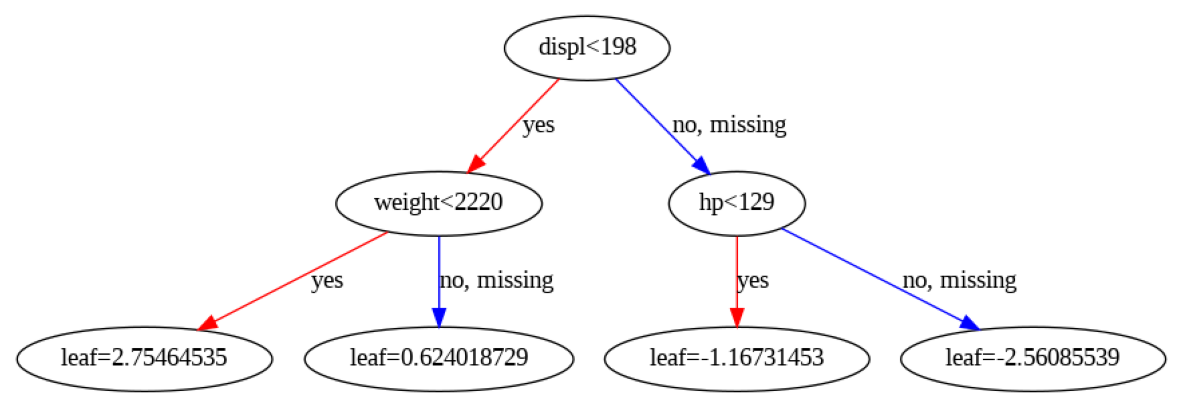

In [16]:
fig, ax = plt.subplots(figsize=(15, 15)) # Adjust figure size as needed
xgb.plot_tree(model, tree_idx=0, ax=ax)
plt.show()

In [17]:
xgb_model.score(X_test, y_test)

NotFittedError: need to call fit or load_model beforehand